<a href="https://colab.research.google.com/github/sshd911/Kaggle/blob/main/NovozymesEnzymeStabilityPrediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret
!pip install pandas-profiling==3.1.0

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")
updates = pd.read_csv("train2.csv")

drop_seq_ids = updates[updates["pH"].isnull()]["seq_id"].values
change_seq_ids = updates[updates["pH"].notnull()]["seq_id"].values

# drop
df.drop(df[df.seq_id.isin(drop_seq_ids)].index, inplace=True)

# change
df.loc[df.seq_id.isin(change_seq_ids), ["pH", "tm"]] = updates[
    updates.seq_id.isin(change_seq_ids)
][["pH", "tm"]].values

df.to_csv("updated_train.csv", index=False)

train_data = pd.read_csv('updated_train.csv')
test_data = pd.read_csv('test.csv')

train_data.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28981 entries, 0 to 28980
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            28981 non-null  int64  
 1   protein_sequence  28981 non-null  object 
 2   pH                28695 non-null  float64
 3   data_source       28001 non-null  object 
 4   tm                28981 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ MB


In [4]:
train_data = train_data.drop('data_source', axis=1)

In [ ]:
!pip install bio-embeddings[all]

In [5]:
train_data.dropna(inplace=True)

In [6]:
from bio_embeddings.embed import SeqVecEmbedder

embedder = SeqVecEmbedder()

embedding = embedder.embed(train_data['protein_sequence'])

In [7]:
a = np.add(embedding[0], embedding[1])
c = np.zeros(len(a))

for i in range(len(a)):
  b = 0
  for j in range(len(a[0]+1)):
    b += a[i][j]
  c[i] = b

In [30]:
test_embedder = SeqVecEmbedder()
test_embedding = test_embedder.embed(test_data['protein_sequence'])

t_a = np.add(test_embedding[0], test_embedding[1])
t_c = np.zeros(len(t_a))
for i in range(len(t_a)):
  t_b = 0
  for j in range(len(t_a[0]+1)):
    t_b += t_a[i][j]
  t_c[i] = t_b

test_data['protein_sequence'] = pd.Series(t_c)

In [32]:
test_data = test_data.drop('data_source', axis=1)

In [11]:
train_data['protein_sequence'] = pd.Series(c)

In [9]:
from pycaret.utils import enable_colab

In [20]:
from pycaret.regression import setup

clf = setup(data=train_data, target="tm", session_id=123, ignore_features=["seq_id"])

,Description,Value
0,session_id,123
1,Target,tm
2,Original Data,"(28409, 4)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(19886, 2)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['seq_id'], id_columns=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='tm',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [21]:
from pycaret.regression import compare_models

best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,8.2510,138.0668,11.7481,0.0568,0.2044,0.1572,0.058
gbr,Gradient Boosting Regressor,8.3016,139.1901,11.7955,0.0492,0.2054,0.1583,0.092
ridge,Ridge Regression,8.7285,146.3395,12.0943,0.0006,0.2110,0.1665,0.174
lar,Least Angle Regression,8.7285,146.3395,12.0943,0.0006,0.2110,0.1665,0.013
br,Bayesian Ridge,8.7258,146.3431,12.0944,0.0006,0.2110,0.1664,0.012
lr,Linear Regression,8.7285,146.3395,12.0943,0.0006,0.2110,0.1665,0.799
omp,Orthogonal Matching Pursuit,8.7282,146.3544,12.0949,0.0005,0.2110,0.1665,0.013
en,Elastic Net,8.7098,146.4948,12.1006,-0.0005,0.2111,0.1661,0.172
llar,Lasso Least Angle Regression,8.7096,146.4943,12.1006,-0.0005,0.2111,0.1661,0.012
lasso,Lasso Regression,8.7096,146.4942,12.1006,-0.0005,0.2111,0.1661,0.168


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [22]:
print(best_model)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [23]:
from pycaret.regression import models

models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [24]:
from pycaret.regression import create_model

lightgbm = create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.0928,131.2559,11.4567,0.0366,0.2007,0.1553
1,8.4506,142.3657,11.9317,0.0616,0.2090,0.1611
2,8.4050,141.8681,11.9108,0.0727,0.2058,0.1582
3,8.2683,140.8143,11.8665,0.0561,0.2048,0.1563
4,8.3267,143.4264,11.9761,0.0554,0.2074,0.1576
5,8.2003,133.6705,11.5616,0.0469,0.2035,0.1580
6,8.1518,135.3003,11.6319,0.0658,0.2030,0.1569
7,8.0128,130.6400,11.4298,0.0582,0.1990,0.1531
8,8.1989,135.5064,11.6407,0.0530,0.2034,0.1579


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [25]:
print(lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [26]:
from pycaret.regression import tune_model

tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.1498,132.3308,11.5035,0.0287,0.2019,0.1566
1,8.6633,147.0980,12.1284,0.0304,0.2131,0.1657
2,8.5424,145.1521,12.0479,0.0512,0.2082,0.1608
3,8.3716,142.7223,11.9466,0.0433,0.2061,0.1582
4,8.4403,145.6308,12.0678,0.0409,0.2090,0.1595
5,8.2781,135.6102,11.6452,0.0331,0.2053,0.1597
6,8.2577,137.9575,11.7455,0.0475,0.2050,0.1587
7,8.0862,132.4573,11.5090,0.0451,0.2009,0.1550
8,8.3605,139.0357,11.7913,0.0284,0.2060,0.1607


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:LGBMRegressor(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
              n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
              random_state=123, reg_alpha=0.0001, reg_lambda=0.1, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [27]:
print(tuned_lightgbm)

LGBMRegressor(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
              n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
              random_state=123, reg_alpha=0.0001, reg_lambda=0.1, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


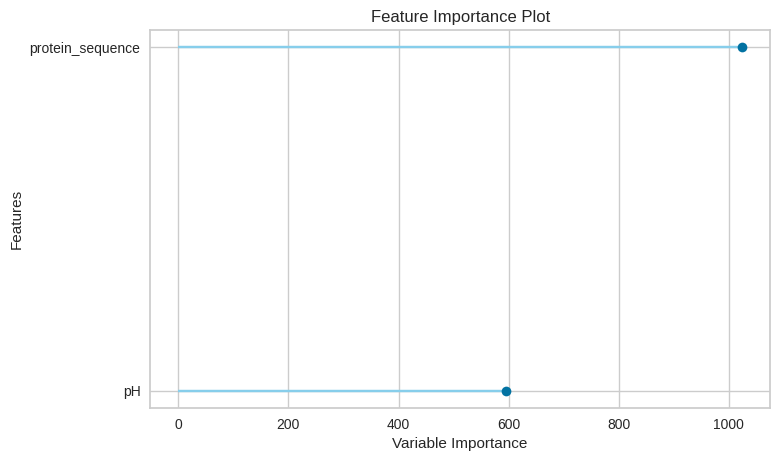

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [28]:
from pycaret.regression import plot_model

plot_model(tuned_lightgbm, plot="feature")

In [29]:
from pycaret.regression import finalize_model

final_lightgbm = finalize_model(lightgbm)
print(final_lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [33]:
test_data.head()

,seq_id,protein_sequence,pH
0,31390,-35.108547,8
1,31391,-38.425301,8
2,31392,-40.074711,8
3,31393,-40.427204,8
4,31394,-41.670207,8


In [34]:
from pycaret.regression import predict_model

test_pred = predict_model(final_lightgbm, data=test_data)
test_pred.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,seq_id,protein_sequence,pH,Label
0,31390,-35.108547,8,62.147414
1,31391,-38.425301,8,50.898850
2,31392,-40.074711,8,64.801844
3,31393,-40.427204,8,60.553512
4,31394,-41.670207,8,49.108002


In [38]:
subm_data = test_pred[["seq_id", "Label"]]
subm_data = subm_data.rename(columns={"Label" : "tm"})

subm_data.to_csv("submittion.csv", index=False)

subm_data

,seq_id,tm
0,31390,62.147414
1,31391,50.898850
2,31392,64.801844
3,31393,60.553512
4,31394,49.108002
...,...,...
2408,33798,52.324319
2409,33799,53.765329
2410,33800,53.108727
2411,33801,52.930086
